In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('F:\\Datasets\\data.csv')

# 1) The shape, head and info gives the idea about the dataset.

In [3]:
df.shape

(30697, 25)

In [4]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [6]:
#to show the null values in each column, as stated only shot_made_flag has 5000 Nan's
df.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

# #DATA VISUALIZATION 

# 2) Let's analyse the dataset by some simple visualizations.

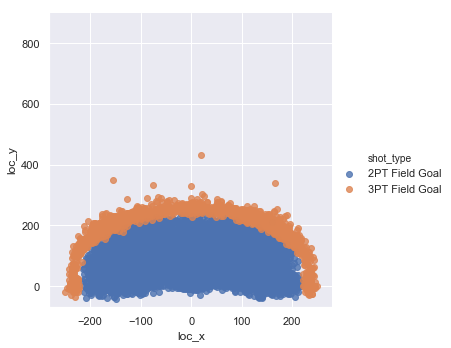

In [9]:
sns.set(rc={'figure.figsize':(20,15)})

#plot when shots made flag
sns.lmplot('loc_x','loc_y',data=df[df.shot_made_flag == 1.0],hue = 'shot_type',fit_reg = False).set(ylim=(-70, 900))

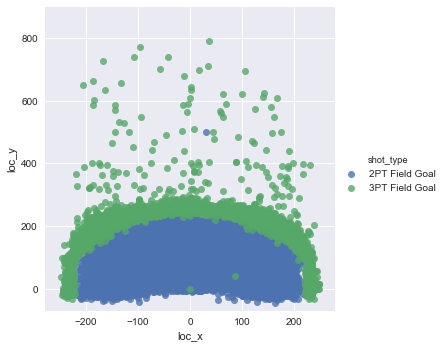

In [338]:
#plot when shots did not made flag
sns.lmplot('loc_x','loc_y',data=df[df.shot_made_flag == 0.0],hue='shot_type',fit_reg = False).set(ylim=(-70, 900))

In [339]:
#The farthest point in the first graph, is the farthest distance from which he scored a basket in his entire caree.
# which is calculated as shown.
df[df.shot_made_flag == 1.0].shot_distance.max()

43

# 3) It is clear that, kobe has high failure rate when he tries for 3 pointer. 
# It is evident that kobe has never scored a point over the distance of 43ft from the basket. As the farthest distance from which he scored the basket is 43 ft.


# Lets get some understanding about the different zones and the shots made from those zones.

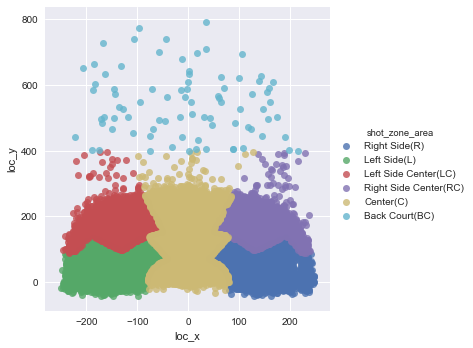

In [340]:
sns.lmplot('loc_x','loc_y',data=df,hue='shot_zone_area',fit_reg = False)
#A simple visualization to show the different shot zones

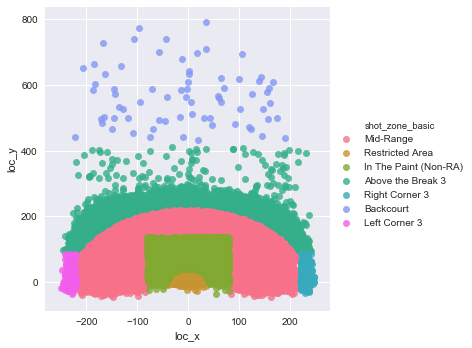

In [341]:
sns.lmplot('loc_x','loc_y',data=df,hue='shot_zone_basic',fit_reg = False)

# 4) Lets see how the shots made flag changes with the distance from which the ball is shooted.

In [7]:
#Groups the dataframe according to the shot_distance and the sums the columns(only numerical)
df1 = df.groupby('shot_distance').sum()

Text(0.5,1,'Shot_distance vs the shots_made_flag')

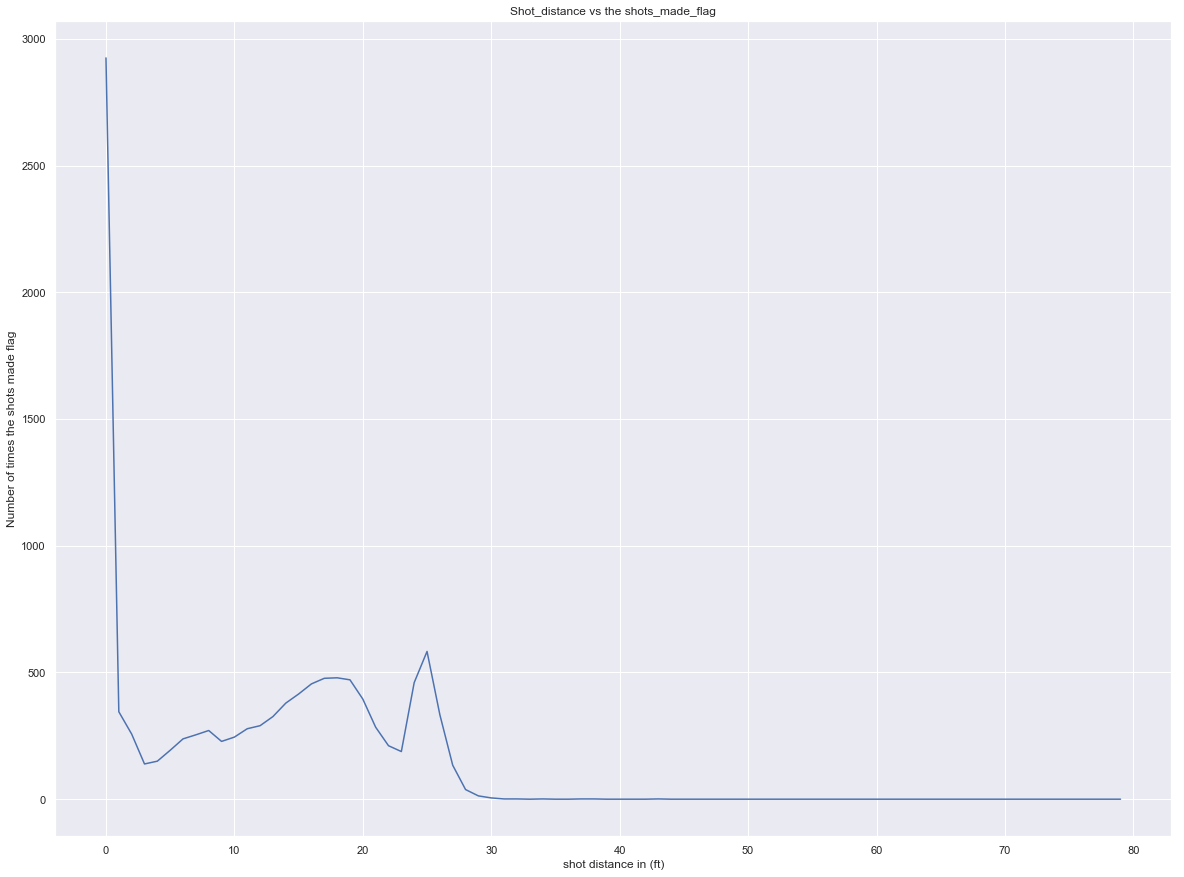

In [11]:
plt.plot(df1.index,df1.shot_made_flag)
plt.xlabel("shot distance in (ft)")
plt.ylabel("Number of times the shots made flag")
plt.title("Shot_distance vs the shots_made_flag")

# 5) The above curve shows the relation between the distance of the shot and the number of baskets the ball made.


In [344]:
df1.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_made_flag,team_id,shot_id
shot_distance,,,,,,,,,,,,,
0,1346057,139778162591,188672.8796,98,631,-655451.1336,27111,13793,813,159329,2925.0,8926015843874,78428348
1,157096,15332424513,21647.6508,354,4524,-75219.2388,3024,1544,85,17958,345.0,1024349707092,11966784
2,145857,13815679457,19771.5953,2157,8143,-68712.5968,2572,1408,69,17210,257.0,935766006007,10605788
3,91402,9044282800,12825.6281,-93,9073,-44587.8076,1888,917,44,11150,139.0,607201005619,6448049
4,91307,9158584157,12550.2727,739,12074,-43640.8172,1844,918,53,10453,150.0,594316103643,5943095


# 6) The common sense, more number of attempts will be made near to the basket.
# So, the above plot is not really useful, so we calculate the accuracy of shots made instead of the number of shots made flag. By that, I mean the number of shots made flag from that spot divided by the number of attempts made to basket from that spot.

In [345]:
#team id is 1610612747, so dividing it by df1['team_id'] gives the number of times the particular index has occured,(there may be other efficients methods, but this idea came to my mind).
#dividing the shot_made_flag with value calculated above gives the accuracy of the shotmadeflag.
#Little tricky, but you will understand.
df1['hit_rate'] = df1['shot_made_flag']/(df1['team_id']/1610612747)

In [346]:
df1.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_made_flag,team_id,shot_id,hit_rate
shot_distance,,,,,,,,,,,,,,
0,1346057,139778162591,188672.8796,98,631,-655451.1336,27111,13793,813,159329,2925.0,8926015843874,78428348,0.527788
1,157096,15332424513,21647.6508,354,4524,-75219.2388,3024,1544,85,17958,345.0,1024349707092,11966784,0.542453
2,145857,13815679457,19771.5953,2157,8143,-68712.5968,2572,1408,69,17210,257.0,935766006007,10605788,0.442341
3,91402,9044282800,12825.6281,-93,9073,-44587.8076,1888,917,44,11150,139.0,607201005619,6448049,0.368700
4,91307,9158584157,12550.2727,739,12074,-43640.8172,1844,918,53,10453,150.0,594316103643,5943095,0.406504


Text(0.5,1,'Shot_distance vs the accuracy of the shots made flag')

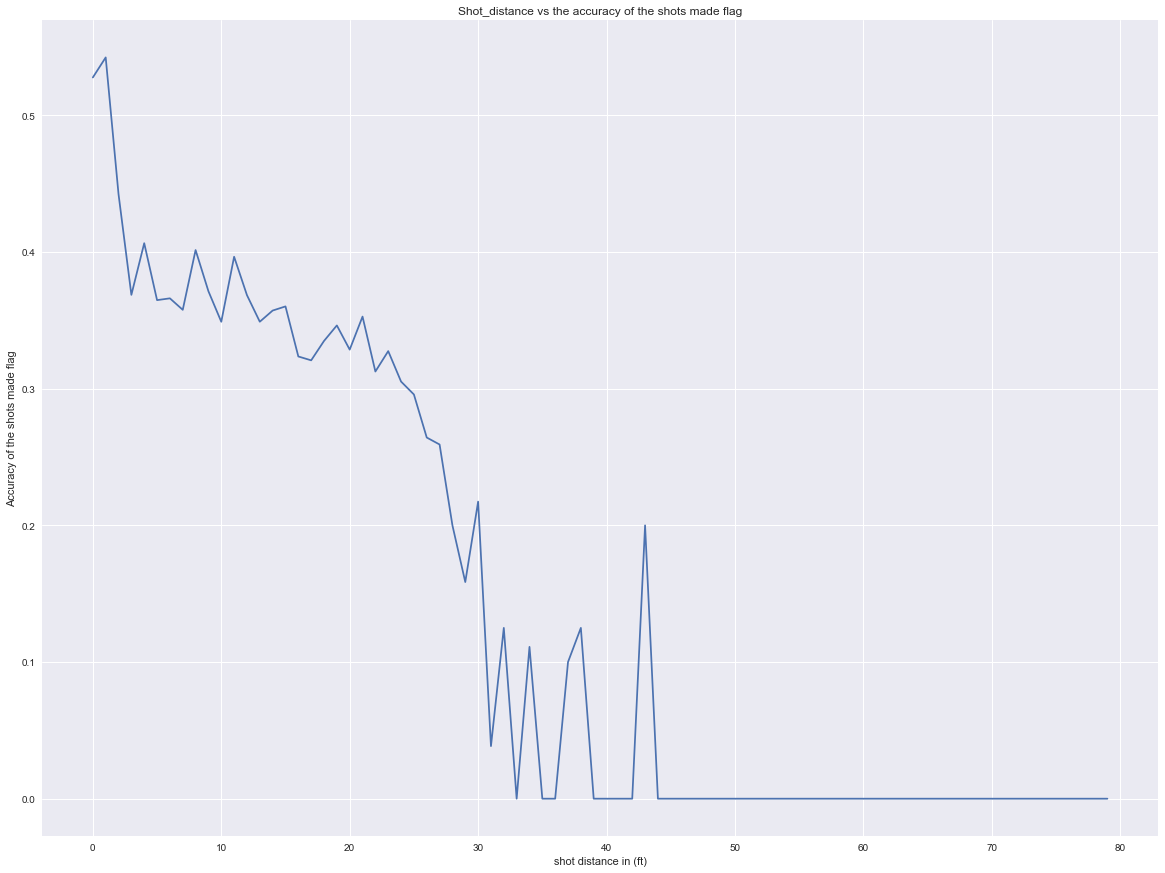

In [347]:
plt.plot(df1.index,df1.hit_rate)
plt.xlabel("shot distance in (ft)")
plt.ylabel("Accuracy of the shots made flag")
plt.title("Shot_distance vs the accuracy of the shots made flag")

# 7) The above graph makes sense as it plots the accuracy of the shots made.
# So, the accuracy decreases with the distance from the basket( common sense).

# 8) Lets now see how Kobe attacks by zones

In [348]:
df2 = df.groupby('shot_zone_area').sum()

In [349]:
df2['shot_made_flag']


shot_zone_area
Back Court(BC)              1.0
Center(C)                5933.0
Left Side Center(LC)     1215.0
Left Side(L)             1243.0
Right Side Center(RC)    1523.0
Right Side(R)            1550.0
Name: shot_made_flag, dtype: float64

# 9) It shows that Kobe attacks some what more from the right side of the court. But cant use this analysis as the basket ball players in general moves around the sides very often.

# 10) Now, lets see how kobe performance with the time period

In [350]:
# groups by season and sums the numerical columns.
df3 = df.groupby('season').sum()

In [351]:
df3['hit_rate'] = df3['shot_made_flag']/(df3['team_id']/1610612747)

In [352]:
df3.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,hit_rate
season,,,,,,,,,,,,,,,
1996-97,130322,15219484388,16198.9111,208,40220,-56414.4866,2277,1348,55,12695,5664,162.0,768262280319,11406665,0.339623
1997-98,273562,30893833033,33588.9347,-6058,80878,-116974.8902,4422,2634,76,26962,11432,349.0,1592896006783,24000526,0.352882
1998-99,221810,30286066207,31287.0113,8794,67789,-108917.6918,4803,2291,142,26571,10772,351.0,1483374339987,23476669,0.381107
1999-00,359220,55033142380,53557.8861,3492,129975,-186507.9826,8054,3801,394,43958,18812,604.0,2539936302019,42310278,0.383006
2000-01,438168,44520781235,63445.4004,12274,149352,-220915.7124,9437,4653,358,52762,22638,735.0,3008624611396,10583950,0.393469


Text(0.5,1,'Season vs the accuracy of the shots made flag')

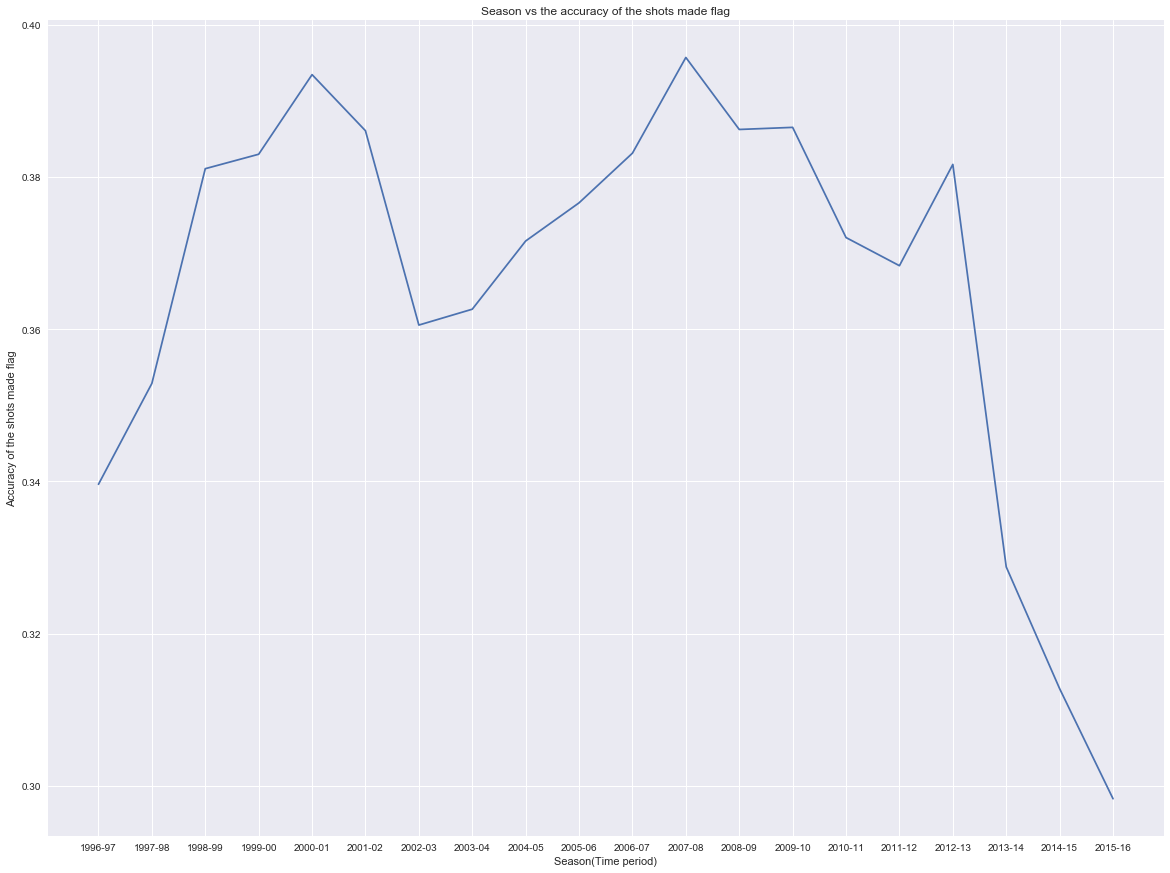

In [353]:
plt.plot(df3.index,df3.hit_rate)
plt.xlabel("Season(Time period)")
plt.ylabel("Accuracy of the shots made flag")
plt.title("Season vs the accuracy of the shots made flag")

# 11) The above graph shows the accuracy of shots with the season.
# The graph shows that in the last four years Kobe's accuracy of shots has gone down drastically. (Looks like the retirement is a good decision)

# 12) Lets now see the Kobe's shots positioning with the time.

In [354]:
#Groups data frame by season and the averages the numerical columns.
df4 = df.groupby('season').mean()

In [355]:
df4.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
season,,,,,,,,,,,,,,
1996-97,273.211740,3.190668e+07,33.959981,0.436059,84.318658,-118.269364,4.773585,2.825996,0.115304,26.614256,11.874214,0.422977,1.610613e+09,23913.343816
1997-98,276.604651,3.123744e+07,33.962522,-6.125379,81.777553,-118.275925,4.471183,2.663296,0.076845,27.261881,11.559151,0.430864,1.610613e+09,24267.468150
1998-99,240.836048,3.288389e+07,33.970696,9.548317,73.603692,-118.260252,5.214984,2.487514,0.154180,28.850163,11.695983,0.458824,1.610613e+09,25490.411509
1999-00,227.786937,3.489736e+07,33.961881,2.214331,82.419150,-118.267586,5.107166,2.410273,0.249841,27.874445,11.928979,0.460366,1.610613e+09,26829.599239
2000-01,234.565310,2.383339e+07,33.964347,6.570664,79.952891,-118.263229,5.051927,2.490899,0.191649,28.245182,12.118844,0.466667,1.610613e+09,5665.926124


Text(0.5,1,'Season vs Shot_distance')

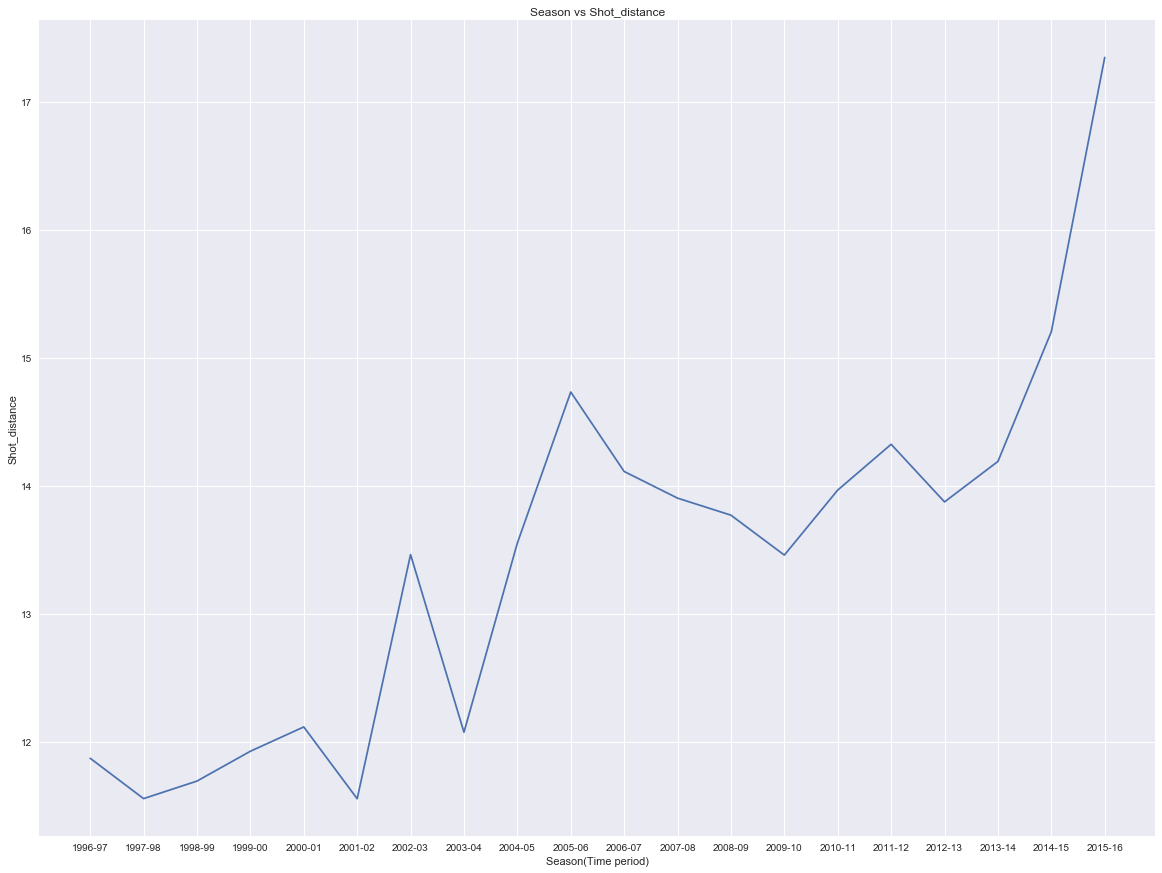

In [356]:
plt.plot(df4.index,df4.shot_distance)
plt.xlabel("Season(Time period)")
plt.ylabel("Shot_distance")
plt.title("Season vs Shot_distance")

# 13) It is clear that with the aging kobe is not preferring for the layup shots instead choosing for the 3 ptrs, I dont think its a good thing or bad thing as the longer distances will fetch 3 pointer, but they also has high chances of missing the goal.
# In my view, (with very less basket ball knowledge), Kobe is preferring for the longer range shots as opponents are defending the ball from Kobe as he is reaching the closer to basket. 

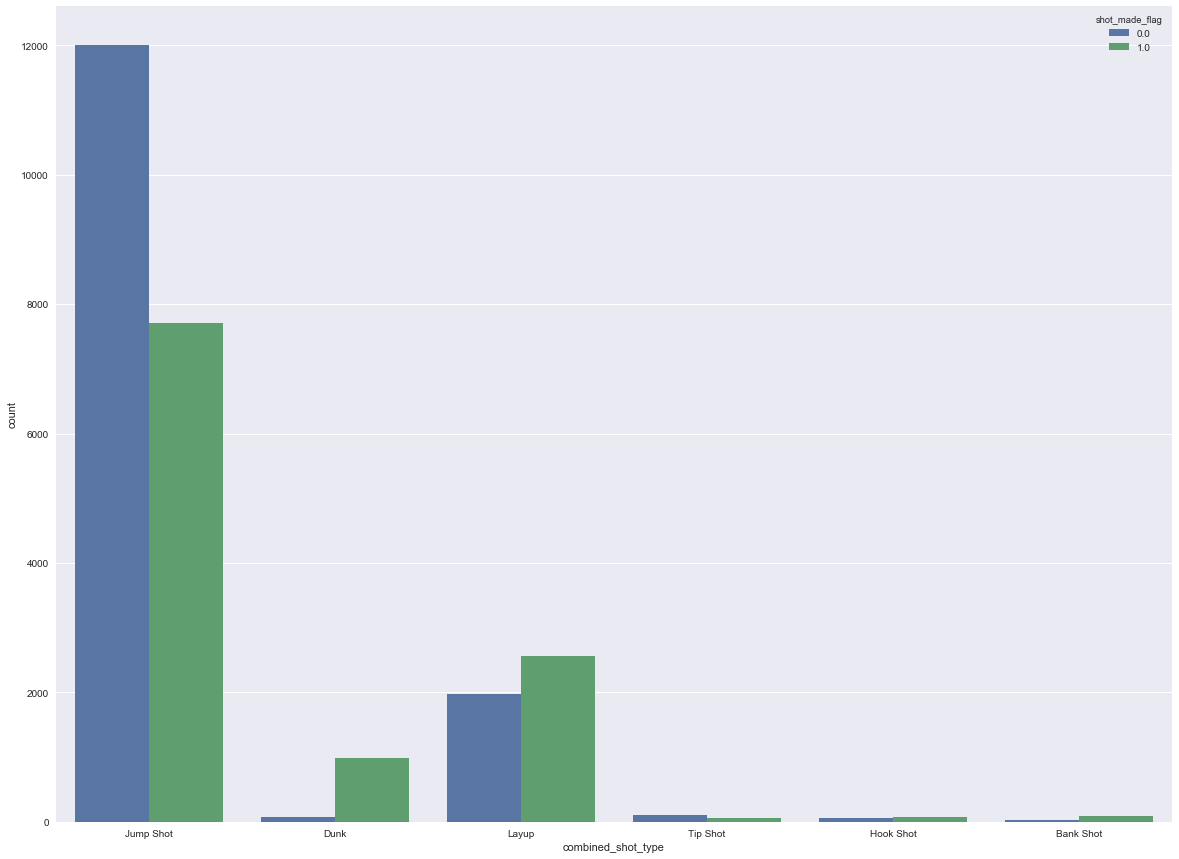

In [357]:
sns.countplot('combined_shot_type',data = df, hue ='shot_made_flag')

# 14) So, the most common shot is the Jumpshot and then the Layup.

# # DATA PREPARATION

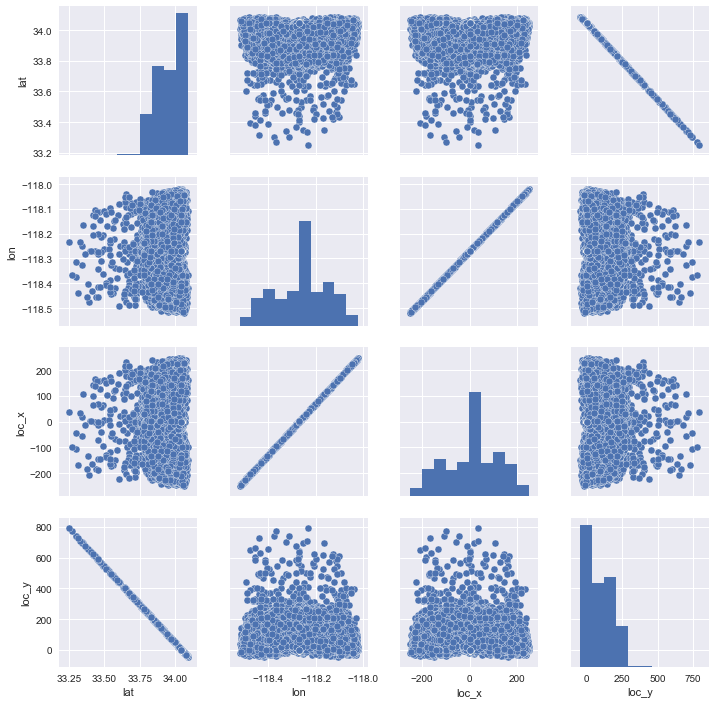

In [358]:
#Lets drop some useless columns.
sns.pairplot(df, vars =['lat','lon','loc_x','loc_y'])

# 15) The above is clear that, (loc_x ,loc_y) and (lat , lon) represent the same. So, drop one of those.


In [359]:
df.drop('lat',axis=1,inplace = True)
df.drop('lon',axis=1,inplace = True)

In [360]:
df.shape

(30697, 23)

In [361]:
df.iloc[:5,:12]

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance
0,Jump Shot,Jump Shot,10,20000012,167,72,10,1,0,2000-01,27,18
1,Jump Shot,Jump Shot,12,20000012,-157,0,10,1,0,2000-01,22,15
2,Jump Shot,Jump Shot,35,20000012,-101,135,7,1,0,2000-01,45,16
3,Jump Shot,Jump Shot,43,20000012,138,175,6,1,0,2000-01,52,22
4,Driving Dunk Shot,Dunk,155,20000012,0,0,6,2,0,2000-01,19,0


In [362]:
df.iloc[:5,12:]

,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [363]:
len(df.game_id.unique())

1559

# 16) Lets calculate how many points each shot made flag scored and number of points scored every season.

In [364]:
df['points'] = df.shot_type.apply(lambda x: x.split('P')[0]).astype(int)

In [365]:
df['points_scored'] = df['shot_made_flag'] * df['points']
df.drop('points',axis =1, inplace = True)

In [366]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,season,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,points_scored
0,Jump Shot,Jump Shot,10,20000012,167,72,10,1,0,2000-01,...,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,NaN
1,Jump Shot,Jump Shot,12,20000012,-157,0,10,1,0,2000-01,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,0.0
2,Jump Shot,Jump Shot,35,20000012,-101,135,7,1,0,2000-01,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,2.0
3,Jump Shot,Jump Shot,43,20000012,138,175,6,1,0,2000-01,...,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,0.0
4,Driving Dunk Shot,Dunk,155,20000012,0,0,6,2,0,2000-01,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,2.0


In [367]:
# groups by season and sums the numerical columns.
df5 = df.dropna()
df5 = df5.groupby('season').sum()

Text(0.5,1,'Season vs Points scored in that season')

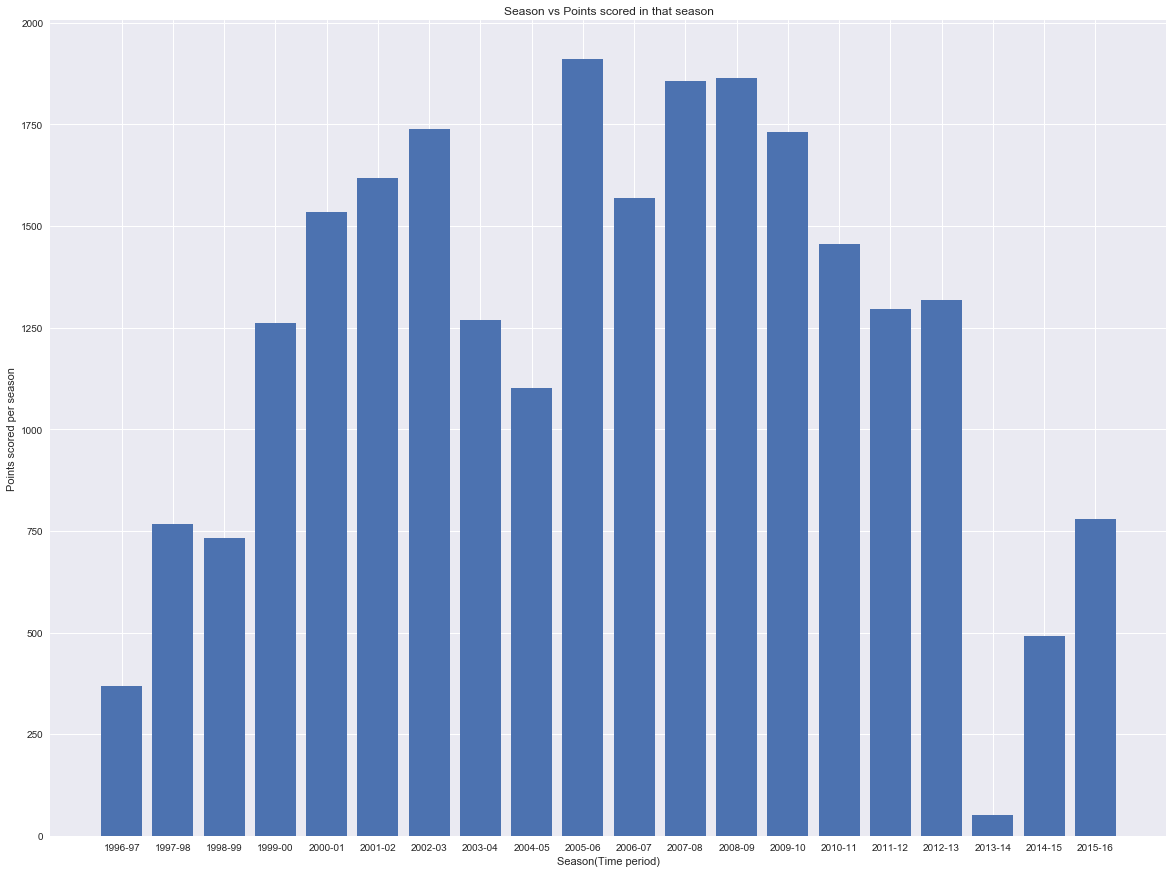

In [368]:
plt.bar(df5.index,df5.points_scored)
plt.xlabel("Season(Time period)")
plt.ylabel("Points scored per season")
plt.title("Season vs Points scored in that season")

# 17) If you examine clearly, there is no real use of the columns team_id, team_name, game_event_id, game_id. So, removing them is a good option.


In [369]:
df.drop('game_id',axis=1,inplace = True)
df.drop('game_event_id',axis=1,inplace = True)
df.drop('team_id',axis=1,inplace = True)
df.drop('team_name',axis=1,inplace = True)

In [370]:
df.shape

(30697, 20)

# 18) The opponent and the matchup also represents the same thing, so remove the matchup column

In [371]:
df.drop('matchup',axis =1, inplace = True)

In [372]:
df.shape

(30697, 19)

# 19) The game_date and shot_id also has no use.

In [373]:
df.drop('game_date',axis=1,inplace=True)
df.drop('shot_id',axis=1,inplace=True)

In [374]:
df.shape

(30697, 17)

# 20) The points_Scored column which you have created above is no more useful, so delete it

In [375]:
df.drop('points_scored',axis =1, inplace = True)

In [376]:
df.shape

(30697, 16)

# 21) Lets convert the minutes and seconds to single column

In [377]:
df['total_seconds'] =  df['seconds_remaining'] + 60*df['minutes_remaining']

In [378]:
df.head()

,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,total_seconds
0,Jump Shot,Jump Shot,167,72,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR,627
1,Jump Shot,Jump Shot,-157,0,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,622
2,Jump Shot,Jump Shot,-101,135,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,465
3,Jump Shot,Jump Shot,138,175,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,412
4,Driving Dunk Shot,Dunk,0,0,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,379


# 22) Now remove the minutes and the seconds columns

In [379]:
df.drop('minutes_remaining',axis=1, inplace = True )

In [380]:
df.drop('seconds_remaining',axis=1, inplace = True )

In [381]:
df.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,total_seconds
0,Jump Shot,Jump Shot,167,72,1,0,2000-01,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR,627
1,Jump Shot,Jump Shot,-157,0,1,0,2000-01,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,622
2,Jump Shot,Jump Shot,-101,135,1,0,2000-01,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,465
3,Jump Shot,Jump Shot,138,175,1,0,2000-01,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,412
4,Driving Dunk Shot,Dunk,0,0,2,0,2000-01,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,379


# 23) Since, we have equal attacks from both sides we can remove the shot_zone_ares as it doesnt contribute much to the model, we can also remove the shot_zone_basic for the same reason.

In [382]:
df.drop('shot_zone_area',axis=1, inplace = True )
df.drop('shot_zone_basic',axis=1, inplace = True )

In [383]:
df.shape

(30697, 13)

In [384]:
df.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_range,opponent,total_seconds
0,Jump Shot,Jump Shot,167,72,1,0,2000-01,18,NaN,2PT Field Goal,16-24 ft.,POR,627
1,Jump Shot,Jump Shot,-157,0,1,0,2000-01,15,0.0,2PT Field Goal,8-16 ft.,POR,622
2,Jump Shot,Jump Shot,-101,135,1,0,2000-01,16,1.0,2PT Field Goal,16-24 ft.,POR,465
3,Jump Shot,Jump Shot,138,175,1,0,2000-01,22,0.0,2PT Field Goal,16-24 ft.,POR,412
4,Driving Dunk Shot,Dunk,0,0,2,0,2000-01,0,1.0,2PT Field Goal,Less Than 8 ft.,POR,379


# 24) Now lets create the dummy variables.

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 13 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_range       30697 non-null object
opponent              30697 non-null object
total_seconds         30697 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 3.0+ MB


In [386]:
dfalt = df

In [387]:
dummy_columns = ['action_type','combined_shot_type','season','shot_type','shot_zone_range','opponent']

In [388]:
for col in dummy_columns:
        dumcol = pd.get_dummies(df[col], prefix = col)
        df = df.join(dumcol)
        df.drop(col, axis =1, inplace = True)
        

In [389]:
df.head()

,loc_x,loc_y,period,playoffs,shot_distance,shot_made_flag,total_seconds,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Cutting Finger Roll Layup Shot,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
0,167,72,1,0,18,NaN,627,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-157,0,1,0,15,0.0,622,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-101,135,1,0,16,1.0,465,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,138,175,1,0,22,0.0,412,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2,0,0,1.0,379,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# 25) Lets split the dataset as training, testing sets and the submission set.

In [390]:
#Submission set with all the nan's and with no shot_flag_made column in it.
sub = df[pd.isnull(df.shot_made_flag)]

In [391]:
#dataset is complete dataset without Nan's
dataset = df[~pd.isnull(df.shot_made_flag)]

In [392]:
#Sub file shouldnt have the shot_made_flag columns
sub.drop('shot_made_flag',axis =1, inplace = True)

C:\Users\HP.DESKTOP-UCJPQBV\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [393]:
y = dataset.shot_made_flag

In [394]:
X = dataset.drop('shot_made_flag',axis=1)

# 26) It's now time for modeling

In [395]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [396]:
#Splitting the training and testing dataset.
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =1)

# 27) Logistic Regression

In [397]:
from sklearn.linear_model import LogisticRegression

In [398]:
logreg = LogisticRegression()

In [399]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [400]:
y_pred_logreg = logreg.predict(X_test)

In [401]:
print("The accuracy on the testing set using logistic Regression is",accuracy_score(y_test,y_pred_logreg))

The accuracy on the testing set using logistic Regression is 0.6818677042801556


In [402]:
confusion_matrix(y_test,y_pred_logreg)

array([[3040,  506],
       [1538, 1341]], dtype=int64)

In [403]:
print("The cross val score using logistic Regression is",cross_val_score(logreg1, X, y, cv=5).mean())

The cross val score using logistic Regression is 0.6763426547428946


# 28) KNeighbors Classifier

In [404]:
from sklearn.neighbors import KNeighborsClassifier

In [405]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [406]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [407]:
y_pred_knn = knn.predict(X_test)

In [408]:
print("The accuracy on the testing set using Kneighbors Classifier is",accuracy_score(y_test,y_pred_knn))

The accuracy on the testing set using Kneighbors Classifier is 0.5684046692607004


In [409]:
confusion_matrix(y_test,y_pred_knn)

array([[2337, 1209],
       [1564, 1315]], dtype=int64)

In [410]:
print("The cross val score using Kneighbors Classifier is",cross_val_score(knn, X, y, cv=5).mean())

The cross val score using Kneighbors Classifier is 0.5609993844280747


# Lets check the Null accuracy

In [434]:
df.shot_made_flag.value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [435]:
14232/(14232+11465)

0.5538389695295171

# The null accuracy is 55.3%, so our model performs better than it.

# 29) The RandomForestClassifier

In [411]:
from sklearn.ensemble import RandomForestClassifier

In [412]:
rfc = RandomForestClassifier(n_estimators = 10)

In [413]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [414]:
y_pred_rfc = rfc.predict(X_test)

In [415]:
print("The accuracy on the testing set using Kneighbors Classifier is",accuracy_score(y_test,y_pred_rfc))

The accuracy on the testing set using Kneighbors Classifier is 0.6442023346303501


In [416]:
confusion_matrix(y_test,y_pred_rfc)

array([[2819,  727],
       [1559, 1320]], dtype=int64)

In [417]:
print("The cross val score using RandomForest Classifier is",cross_val_score(rfc, X, y, cv=5).mean())

The cross val score using RandomForest Classifier is 0.6280499241703218


# 30) So, it has shown that logistic regression runs better than others. So, lets now fit the model with whole data.

In [418]:
 logreg_final = LogisticRegression()

In [419]:
logreg_final.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [420]:
output = logreg_final.predict_proba(sub)

In [421]:
sub.index

Int64Index([    0,     7,    16,    19,    32,    33,    34,    35,    36,
               37,
            ...
            30646, 30648, 30655, 30659, 30664, 30668, 30680, 30682, 30686,
            30693],
           dtype='int64', length=5000)

In [422]:
output

array([[0.58394867, 0.41605133],
       [0.68989825, 0.31010175],
       [0.2315644 , 0.7684356 ],
       ...,
       [0.22882961, 0.77117039],
       [0.24023889, 0.75976111],
       [0.67160727, 0.32839273]])

In [430]:
submission_dataframe = pd.DataFrame({'shot_id':sub.index+1,'shot_made_flag':output[:,1]})

In [431]:
submission_dataframe.to_csv("kobesubmission.csv",index= False)

# This is very very basic modeling, the improvements to be made are
# 1] I have not tuned any hyper parameters to improve the accuracy.
# 2] I have considered only 3 models.
# 3] I have not checked the variance of columns.
# 4] I have not calculated the log loss of the model.
# There are a lot of improvisation that can be made, but since I dont want to put much of the time in this dataset, I'm ending this here.
